# Jobloss Prediction using Linear Regression 

## in statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.
## In Our case to predict the Jobloss status we are going to use the multiple linear regression using other variabes ( Current Status , FinancialSituation , Diseases) 

# Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
XXX = pd.read_csv('DimPatientCoded.csv')
XXX.head()

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Detected State,PovertyRate,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,16,7.05,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,16,7.05,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,8,9.91,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,31,13.74,1,1,India,2,0,1,4,2,0,0,4.0


## Choosing the variables that may help us to predict the jobloss

In [3]:
XX =  XXX[['Current Status','JobLoss','FinancialSituation','Detected State','PovertyRate','Diseases','Profession','Vaccinated']]
dataset = XX.replace(np.nan,0)
dataset

,Current Status,JobLoss,FinancialSituation,Detected State,PovertyRate,Diseases,Profession,Vaccinated
0,1,2,1,16,7.05,4,1,1
1,1,0,0,16,7.05,4,2,1
2,1,2,1,16,7.05,4,1,1
3,1,2,0,8,9.91,2,1,0
4,1,0,1,31,13.74,4,2,0
...,...,...,...,...,...,...,...,...
247231,1,2,0,15,20.91,4,1,1
247232,1,2,0,15,20.91,2,1,0
247233,1,0,1,15,20.91,2,2,0
247234,1,0,1,15,20.91,2,2,1


## informations about our dataset

### Type :

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247236 entries, 0 to 247235
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Current Status      247236 non-null  int64  
 1   JobLoss             247236 non-null  int64  
 2   FinancialSituation  247236 non-null  int64  
 3   Detected State      247236 non-null  int64  
 4   PovertyRate         247236 non-null  float64
 5   Diseases            247236 non-null  int64  
 6   Profession          247236 non-null  int64  
 7   Vaccinated          247236 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 15.1 MB


## Statistical Analysis

In [5]:
dataset.describe()

,Current Status,JobLoss,FinancialSituation,Detected State,PovertyRate,Diseases,Profession,Vaccinated
count,247236.000000,247236.000000,247236.000000,247236.000000,247236.000000,247236.000000,247236.000000,247236.000000
mean,0.378565,0.809858,0.609608,18.156183,20.196047,2.669967,1.735342,0.607933
std,0.581446,0.867908,0.709822,8.647260,7.473078,1.307894,1.522308,0.488212
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,15.000000,15.710000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,15.000000,20.910000,3.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,27.000000,20.910000,4.000000,3.000000,1.000000
max,3.000000,3.000000,2.000000,35.000000,49.010000,4.000000,5.000000,1.000000


## Definining our dataset Columns

In [6]:
dataset.columns

Index(['Current Status', 'JobLoss', 'FinancialSituation', 'Detected State',
       'PovertyRate', 'Diseases', 'Profession', 'Vaccinated'],
      dtype='object')

## Seeing the Correlation between our variables

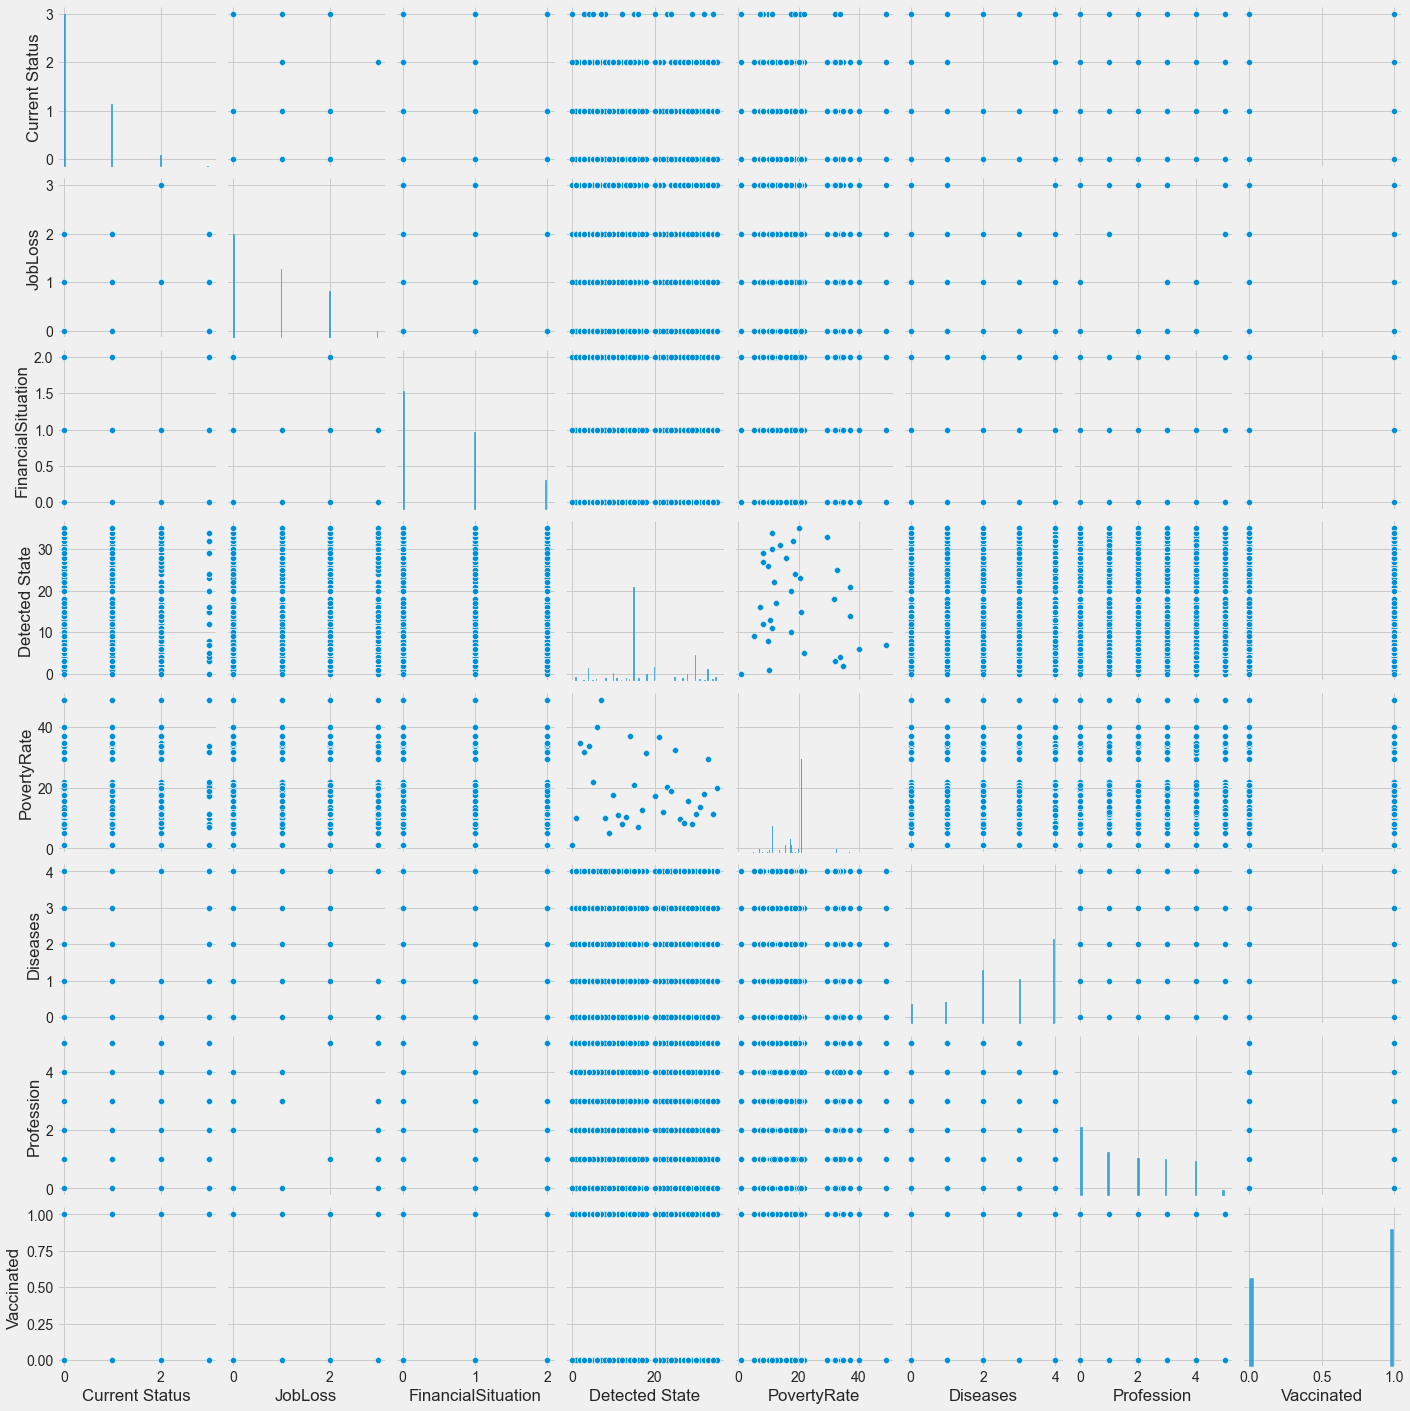

In [7]:
sns.pairplot(dataset)

<AxesSubplot:>

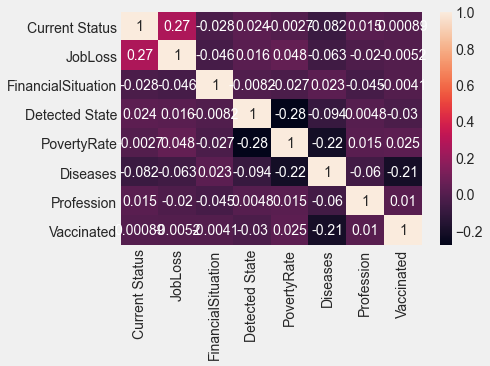

In [8]:
sns.heatmap(dataset.corr(), annot=True)

Mainly the Financial Situation , Diseases , Current status are the most correlated ones with our predicted variable "jobloss"

## Visualizing the density of our variables in order to see the clustring for the fact that they are already coded

<AxesSubplot:xlabel='FinancialSituation', ylabel='Density'>

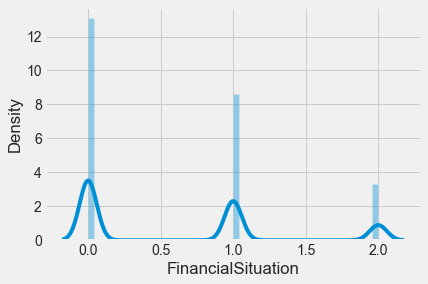

In [9]:
sns.distplot(dataset['FinancialSituation'])

3 clusters

<AxesSubplot:xlabel='JobLoss', ylabel='Density'>

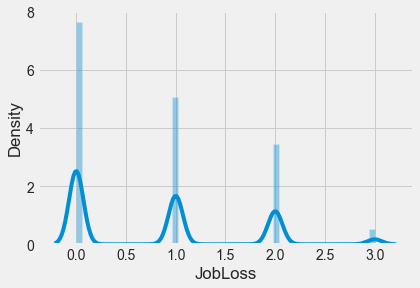

In [10]:
sns.distplot(dataset['JobLoss'])

4 Clusters

<AxesSubplot:xlabel='Profession', ylabel='Density'>

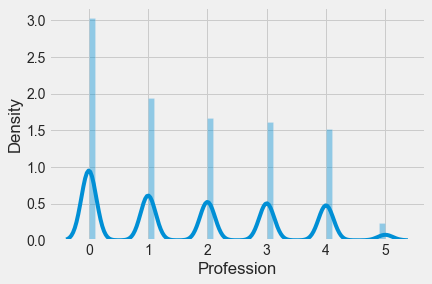

In [11]:
sns.distplot(dataset['Profession'])

6 Clusters

<AxesSubplot:xlabel='PovertyRate', ylabel='Density'>

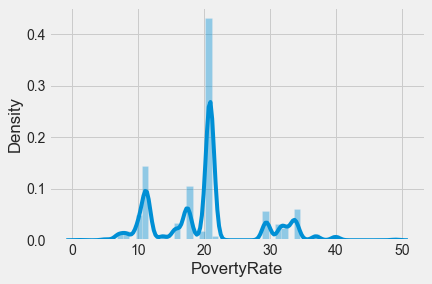

In [12]:
sns.distplot(dataset['PovertyRate'])

cant be detected

<AxesSubplot:xlabel='Detected State', ylabel='Density'>

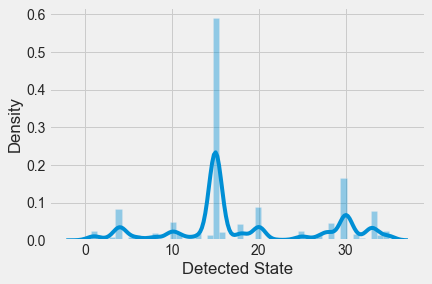

In [13]:
sns.distplot(dataset['Detected State'])

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif      
from sklearn.feature_selection import f_regression  
#Score function:
#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif

kbest = SelectKBest(score_func=f_regression, k=2)
kbest.fit(X_train, y_train)
print("Sélection de variables :", kbest.get_support())
print("Scores de variables :", kbest.scores_)
print("Variables sélectionnées:", list(X.columns[kbest.get_support().sum()]))

NameError: name 'X_train' is not defined

In [62]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [33]:
X_train = kbest.transform(X_train)
X_test = kbest.transform(X_test)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [52]:
# print the intercept
print(lin_reg.intercept_)

0.8118510386271054


In [53]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Current Status,0.231249
FinancialSituation,-0.032107
Diseases,-0.034373


In [54]:
pred = lin_reg.predict(X_test)

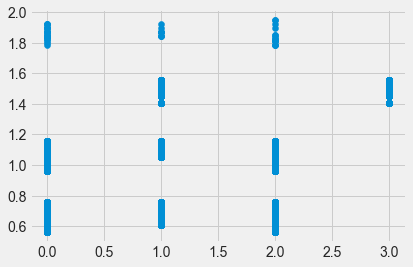

In [55]:
plt.scatter(y_test, pred)

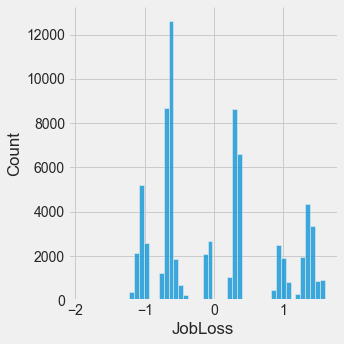

In [56]:
sns.displot((y_test - pred), bins=50);

In [57]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.7342031156586456
MSE: 0.695956950328486
RMSE: 0.8342403432635502
R2 Square 0.0723472122176938
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.7342052457606818
MSE: 0.6970833616834644
RMSE: 0.8349151823289983
R2 Square 0.07615517820531126
__________________________________


In [58]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.734203,0.695957,0.83424,0.072347,0.004872


In [60]:
import pickle
with open('Prediction_FinancialState_LR.pkl', 'wb') as file:
    pickle.dump(lin_reg, file)